In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_f = 'noisyOrX.txt'
Y_f = 'noisyOrY.txt'
X = np.loadtxt(X_f, dtype = int)
Y = np.loadtxt(Y_f, dtype = int)

In [3]:
def loss(p,X,Y):
    temp = X.dot(np.log(1-p))
    return -1 / X.shape[0] * np.sum(Y[:,np.newaxis] * np.log(1-np.exp(temp)) + (1-Y[:,np.newaxis]) * temp)

def M_update(p,X,Y):
    temp0 = X.dot(np.log(1-p))
    temp1 = (X.T * p).T * Y[:,np.newaxis] / (1 - np.exp(temp0))
    p_new = (np.sum(temp1,axis = 0) / np.sum(X,axis = 0))[:,np.newaxis]
    return p_new

def predict(p,X,Y):
    temp = X.dot(np.log(1-p))
    y_prob = 1 - np.exp(temp)
    y_pred = np.where(y_prob >= 0.5, 1,0)
    return np.sum(np.abs(y_pred - Y[:,np.newaxis]))

pi = np.ones((23,1)) * 0.05
initial_loss = loss(pi, X, Y)
initial_error = predict(pi, X, Y)
loss_list, error_list = [initial_loss], [initial_error]

In [4]:
print("iteration 0\tnumber of mistiakes %d\tloss %.5f"%(initial_error,-initial_loss))
import math
max_iteration = 256
for i in range(1,max_iteration+1):
    pi = M_update(pi,X,Y)
    error = predict(pi,X,Y)
    l = loss(pi,X,Y)
    error_list.append(error)
    loss_list.append(l)
    if math.log(i, 2).is_integer():
        print("iteration %d\tnumber of mistiakes %d\tloss %.5f"%(i,error,-l))

iteration 0	number of mistiakes 175	loss -0.95809
iteration 1	number of mistiakes 56	loss -0.49592
iteration 2	number of mistiakes 43	loss -0.40822
iteration 4	number of mistiakes 42	loss -0.36461
iteration 8	number of mistiakes 44	loss -0.34750
iteration 16	number of mistiakes 40	loss -0.33462
iteration 32	number of mistiakes 37	loss -0.32258
iteration 64	number of mistiakes 37	loss -0.31483
iteration 128	number of mistiakes 36	loss -0.31116
iteration 256	number of mistiakes 36	loss -0.31016


In [5]:
error_list = np.array(error_list)
loss_list = np.array(loss_list)
x = np.linspace(0, 256, 257)

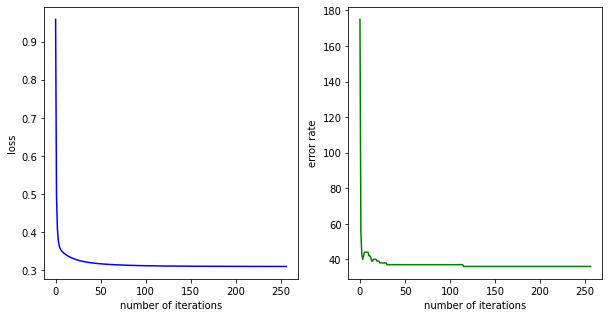

In [6]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.plot(x,loss_list,'b')
plt.xlabel('number of iterations')
plt.ylabel('loss')

fig.add_subplot(122)
plt.plot(x,error_list,'g')
plt.xlabel('number of iterations')
plt.ylabel('error rate')
plt.show()